[Jupyter Book](https://geo-smart.github.io/oceanography/intro.html) and [GitHub repo](https://github.com/geo-smart/oceanography).


# Epipelargosy




> Wavering between the profit and the loss /
In this brief transit where the dreams cross... <br><br>-T.S.Eliot


**Epipelargosy (επιπελαργοση)(noun): A neologism intended to evoke a voyage through the epipelagic zone.**


This notebook introduces physical and bio-optical data from a 
Shallow Profiler, pictured below. 
The profiler base or *platform* is anchored to the sea floor by cables. 
The platform is
positively buoyant and therefore *'floats'* at a depth of 200 meters below the ocean surface.
By means of a cable: A sensor pod is regularly released upward 
from this platform to a few meters depth
and then drawn back down to the platform by means of a winch.
The sensors thereby *see* or *observe* the water column from a depth range of 
10 to 200 meters, usually nine times each day, hence 'shallow profiler'.





```{figure} ../img/shallowprofilerinsitu.png
---
height: 500px
name: directive-fig
---
Shallow Profiler: Platform and Science Pod photographed by ROV; depth 200 meters.
The orange sensor pod (the Science Pod or SCIP) is connected to the rectangular platform
by means of the yellow cable.
Multiple *instruments* are visible attached to the SCIP, each bearing
one or more *sensors*. Sensors correspond to types of data: Temperature, 
salinity, chlorophyll fluorescence and so on. 
```

The shallow profiler platform resides at a site (i.e. a geographic location).
Sites are in turn wired together by means of cables resting on the sea floor.
The result is an enormous undersea observatory called the Regional Cabled Array (RCA). 
The RCA is one of several arrays making up the Ocean Observatories Initiative.

### Technical note

The `shallowprofiler_techical.ipynb` notebook goes to some length to sort out the data dictionary for sensors
and profile metadata use. 

## Load profile metadata and build the data dictionary


The next step is to build a data dictionary **`d `** with keys corresponding to sensors:
**`conductivity`, `temperature`, `pco2`** etcetera. Those sensor names are the dictionary
keys. What are the dictionary values? They are five-tuples indexed like so: \[0\], \[1\], ..., \[4\].
These correspond to two XArray data arrays, 2 floats, and one string:


```
0: XArray DataArray: sensor data
1: XArray DataArray: sensor depth (meters, negative down) corresponding to data
2: float: Default charting lower limit for data
3: float: Default charting upper limit for data
4: string: Default chart color e.g. "blue"
```

Note that if the time extent of the data is one month -- say 30 days -- 
a healthy shallow profiler will generate about $9 \times 30 = 270$ profiles.
Selecting out time blocks that correspond to these profiles is done using
the profile metadata, contained in the dataframe called `profiles`. 

In [1]:
from matplotlib import pyplot as plt
from shallowprofiler import *
from data import *
from charts import *
from os import path

def GetSensorTuple(s, f):
    '''
    s is the sensor identifier string like 'temperature'
    f is the source filename like './../data/osb_ctd_jan22_temperature.nc' 
    '''
    DA_sensor    = xr.open_dataset(f)[s]                # DataArray
    DA_depth     = xr.open_dataset(f)['depth']          # DataArray
    range_lo     = ranges[s][0]                         # expected numerical range of this sensor data
    range_hi     = ranges[s][1]                         #   lo and high
    sensor_color = colors[s]                            #   default chart color for this sensor
    return (DA_sensor, DA_depth, range_lo, range_hi, sensor_color)


profiles = ReadProfileMetadata()


d = {}                # d is an empty dictionary that will be populated with 5-tuples based on 
                      # what data files are resident in the base path. Default is January 2022,
                      # Oregon Slope Base

data_file_root_path   = './data/rca/sensors'
sitestring            = 'osb'
monthstring           = 'jan'               
yearstring            = '2022'

for sensor in sensors:          # sensor is a list of 2 strings [sensor_str, instrument_str]
    f = AssembleDataFilename(data_file_root_path, sitestring, sensor[0], monthstring, yearstring)
    if path.isfile(f):
        d[sensor[0]] = GetSensorTuple(sensor[0], f)    # creates the dictionary d{} entry for this sensor



Jupyter Notebook running Python 3


In [2]:
# Start with CTD temperature and salinity
how_many_charts = 1

# quick check: use d['temperature'].z.plot()
profile_list = [n for n in range(how_many_charts)]

In [3]:
d.keys()

dict_keys(['conductivity', 'density', 'salinity', 'temp', 'chlora', 'backscatter', 'fdom', 'nitrate', 'pco2', 'do', 'ph', 'up', 'east', 'north'])

### Using ChartTwoSensors()


The fossil code below illustrates some aspects of the data dictionary d{}:
- d{} has a key (in this case 'ph') that is the name of a sensor. 
    - The full list of sensor names is given in the Data chapter.
- d[key] has a value: A 5-element tuple
    - The first two elements of this tuple are XArray DataFrames
        - d[key][0] is sensor data as a function of time
        - d[key][1] is depth as a function of time
    - Elements [2] and [3] are the expected numerical range of the sensor data
    - Element [4] is a string: Default plot color for this sensor

```
Data dictionary values
    [0] DataArray: sensor data values, dimension = 'time'  
    [1] DataArray: sensor depths z,    dimension = 'time'    
    [2] low-end expected data range                         
    [3] high-end expected data range                      
    [4] color for this sensor                             

print(d['ph'][0], d['ph'][1])
for a in list(d['ph'][0].attrs.keys()): del d['ph'][0].attrs[a]
for a in list(d['ph'][1].attrs.keys()): del d['ph'][1].attrs[a]
print(d['ph'][0], d['ph'][1])
```

Profile data from two sensors can be compared on a single chart using ChartTwoSensors(). 
The function arguments relate to the data dictionary d{}.

In [4]:
# The sensors data structure is a list of lists. Each element is the list ['<sensor-name>', '<instrument-name>'].
sensors

[['conductivity', 'ctd'],
 ['density', 'ctd'],
 ['pressure', 'ctd'],
 ['salinity', 'ctd'],
 ['temp', 'ctd'],
 ['chlora', 'fluor'],
 ['backscatter', 'fluor'],
 ['fdom', 'fluor'],
 ['spkir412nm', 'spkir'],
 ['spkir443nm', 'spkir'],
 ['spkir490nm', 'spkir'],
 ['spkir510nm', 'spkir'],
 ['spkir555nm', 'spkir'],
 ['spkir620nm', 'spkir'],
 ['spkir683nm', 'spkir'],
 ['nitrate', 'nitrate'],
 ['pco2', 'pco2'],
 ['do', 'do'],
 ['par', 'par'],
 ['ph', 'ph'],
 ['up', 'vel'],
 ['east', 'vel'],
 ['north', 'vel']]

Attempting 1 charts



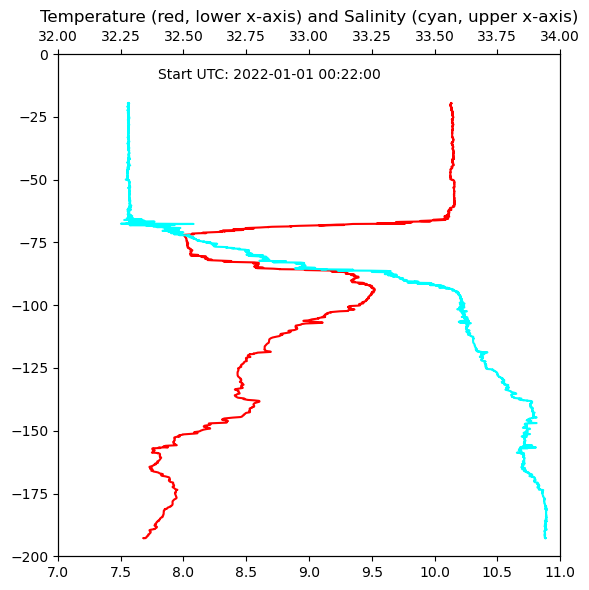

In [5]:
# temperature and salinity
fig,axs = ChartTwoSensors(profiles, [ranges['temp'], ranges['salinity']], profile_list, 
                          d['temp'][0],     -d['temp'][1],     'Temperature', colors['temp'],     'ascent',
                          d['salinity'][0], -d['salinity'][1], 'Salinity',    colors['salinity'], 'ascent', 6, 6)

Interpretation: The upper 70m is a homogeneous *mixed layer*. The transitional section below this
(particularly in terms of salinity) from 70m to 95m represents a sharp change in temperature and salinity.
This is the *pycnocline*, a boundary separating the mixed layer from the lower ocean. From 95m down
to the lowest observed depth of 195m we have water that is colder, more saline, and more dense. The cold
temperature excursion in the data in the 70--90m depth range is an anomalous departure from a monotonic 
gradient. 

Attempting 1 charts



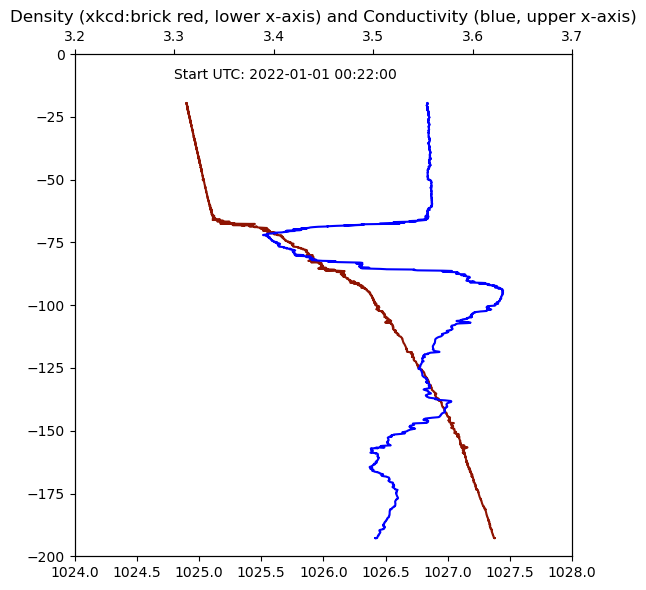

In [6]:
# density and pressure
fig,axs = ChartTwoSensors(profiles, [ranges['density'], ranges['conductivity']], profile_list, 
                          d['density'][0],      -d['density'][1],      'Density',      colors['density'],    'ascent',
                          d['conductivity'][0], -d['conductivity'][1], 'Conductivity', 'blue', 'ascent', 6, 6)

Interpretation: ...hmmmm... compared to the one prior: It seems like conductivity and salinity are not 'pretty much the same thing'...

Attempting 1 charts



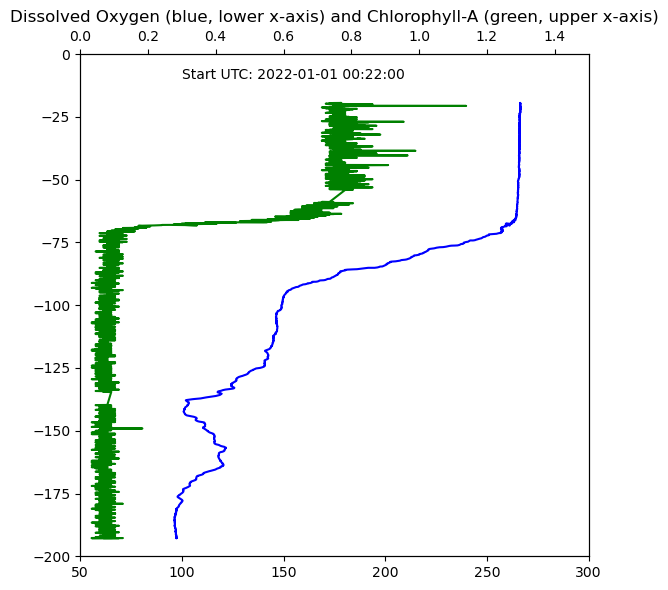

In [7]:
# dissolved oxygen and chlorophyll-a
fig,axs = ChartTwoSensors(profiles, [ranges['do'], ranges['chlora']], profile_list, 
                          d['do'][0],     -d['do'][1], 'Dissolved Oxygen', colors['do'],    'ascent',
                          d['chlora'][0], -d['chlora'][1],    'Chlorophyll-A',  colors['chlora'], 'ascent', 6, 6)

Attempting 1 charts



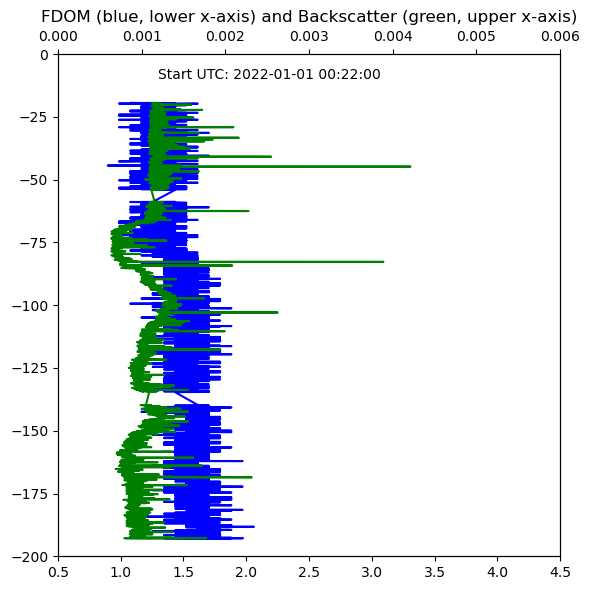

In [8]:
# fdom and backscatter
fig,axs = ChartTwoSensors(profiles, [ranges['fdom'], ranges['backscatter']], profile_list, 
                          d['fdom'][0],         -d['fdom'][1],        'FDOM', colors['do'], 'ascent',
                          d['backscatter'][0],  -d['backscatter'][1], 'Backscatter', colors['chlora'], 'ascent', 6, 6)

Attempting 4 charts



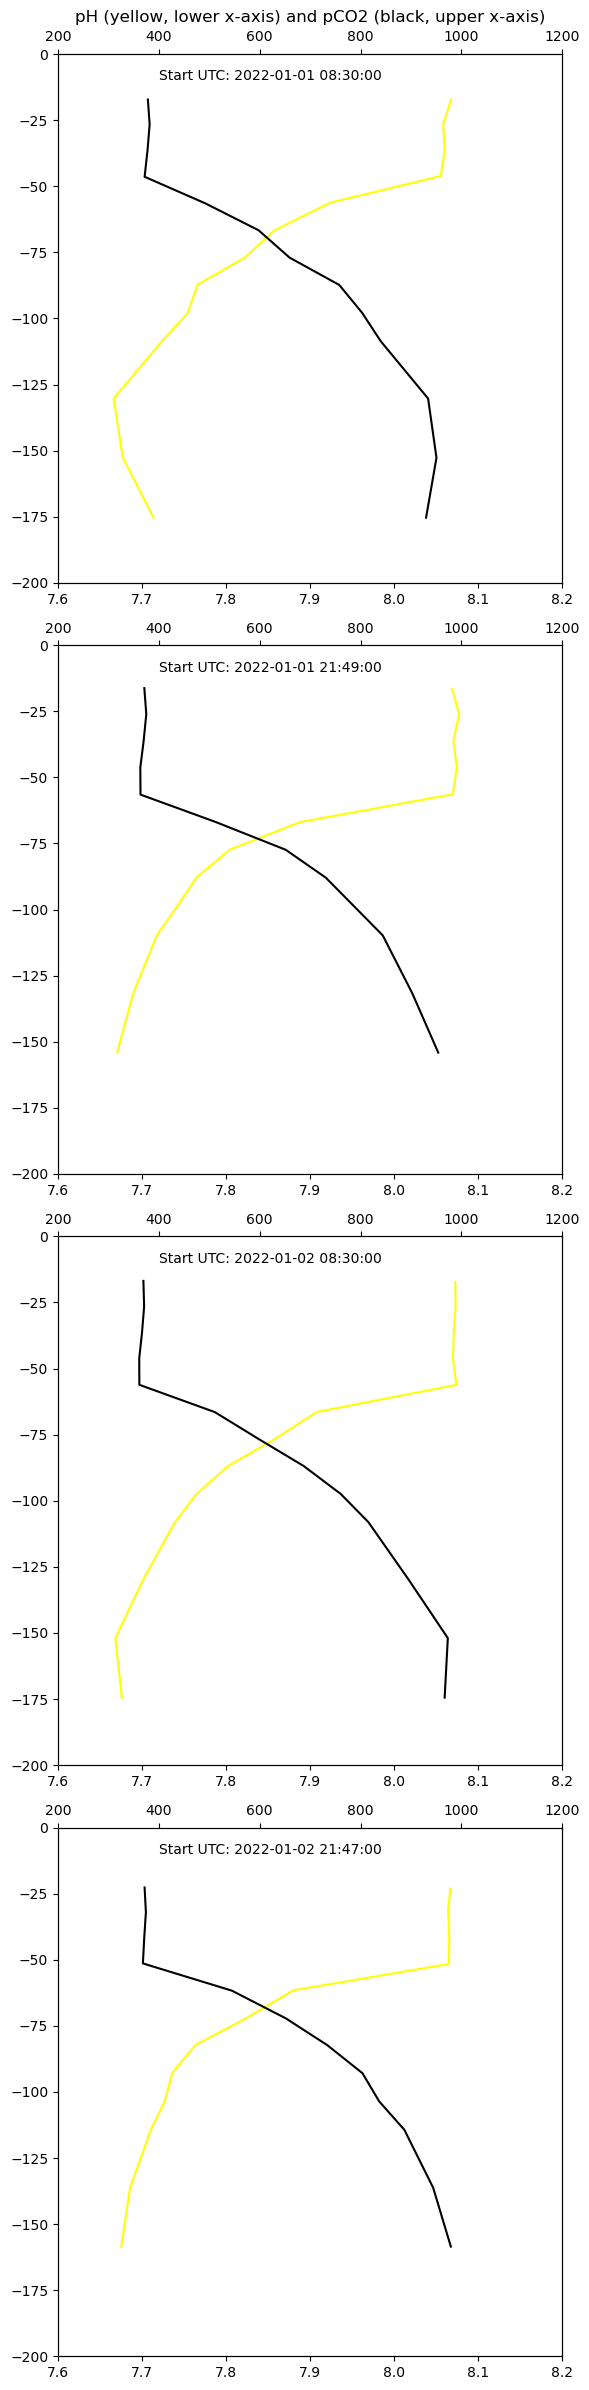

In [9]:
# pH and pCO2
# Notice that pH and pCO2 are measured only on midnight and noon *descents*
#   Profile 3 is the first midnight profile, 8 the first noon (but labels need fixing)
fig,axs = ChartTwoSensors(profiles, [ranges['ph'], ranges['pco2']], [3, 8, 12, 17],
                          d['ph'][0],    -d['ph'][1], 'pH', colors['ph'], 'descent',
                          d['pco2'][0],  -d['pco2'][1], 'pCO2', colors['pco2'], 'descent', 6, 6)

In [10]:
if False:
    # Two good representatives of noon spectral irradiance
    fig,axs = ChartTwoSensors(profiles, [ranges['spkir412nm'], ranges['spkir555nm']], [8, 80],
                              d['spkir412nm'][0], d['spkir412nm'][1], '412nm', colors['spkir412nm'], 'ascent',
                              d['spkir555nm'][0], d['spkir555nm'][1], '555nm', colors['spkir555nm'], 'ascent', 6, 4)


In [11]:
if False:
    # PAR and longer-wavelength spectral irradiance (not a very strong signal; see above)
    fig,axs = ChartTwoSensors(profiles, [ranges['par'], ranges['spkir620nm']], [8, 80],
                              d['par'][0], d['par'][1], 'PAR', colors['par'], 'ascent',
                              d['spkir620nm'][0], d['spkir620nm'][1], 'spkir620nm spkir', 
                              colors['spkir620nm'], 'ascent', 6, 4)

Attempting 4 charts



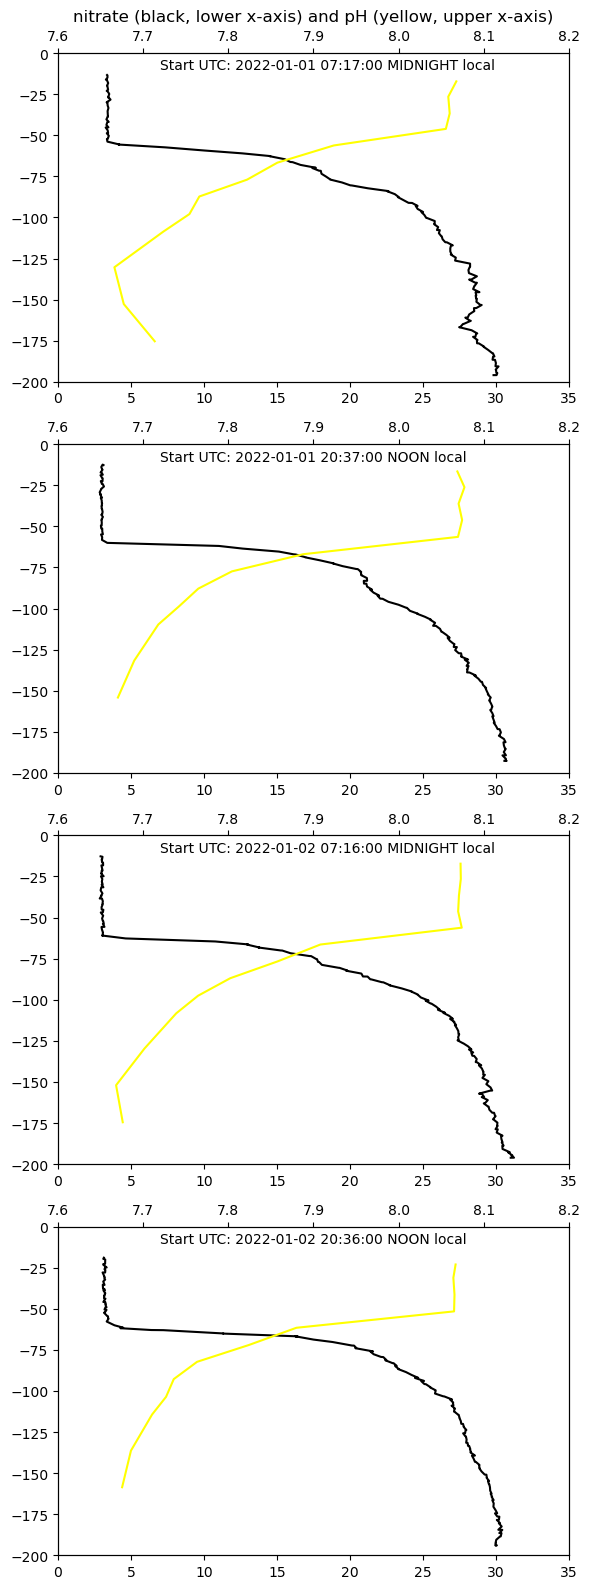

In [12]:
# Nitrate and current velocity 'up' (midnight and noon: ascent for nitrate)
fig,axs = ChartTwoSensors(profiles, [ranges['nitrate'], ranges['ph']], [3, 8, 12, 17],
                          d['nitrate'][0], -d['nitrate'][1], 'nitrate', colors['nitrate'], 'ascent',
                          d['ph'][0], -d['ph'][1], 'pH', colors['ph'], 'descent', 6, 4)

Attempting 1 charts



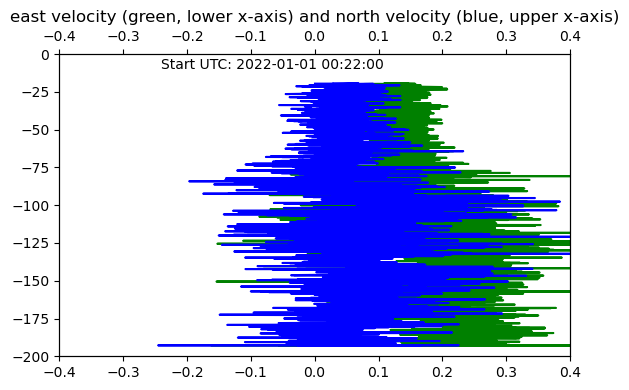

In [13]:
# Current velocity 'east' and 'north'
fig,axs = ChartTwoSensors(profiles, [ranges['east'], ranges['north']], [0],
                          d['east'][0], -d['east'][1], 'east velocity', colors['east'], 'ascent',
                          d['north'][0], -d['north'][1], 'north velocity', colors['north'], 'ascent', 6, 4)

## Another visualization: bundle charts


The charts above show single profiles. Next we look at some 'bundle charts' showing multiple profiles for a given sensor.
This introduces the element of variability across a stretch of time, again recalling that nine profiles reflect a
single day. 


In [15]:
if False: ShowStaticBundles(d, profiles)   # broken

```def BundleChart(profiles, date0, date1, time0, time1, wid, hgt, data, title):
    '''
    Create a bundle chart: Multiple profiles showing sensor/depth in ensemble.
        date0   start / end of time range: date only, range is inclusive [date0, date1]
        date1
        time0   start / end time range for each day
        time1       (this scheme permits selecting midnight or noon)
        wid     figure size
        hgt
        data    a value from the data dictionary (5-tuple: includes range and color)
        title   chart title
BundleChart(profiles, dt64('2022-01-01'), dt64('2022-02-01'), td64(0, 'h'), td64(24, 'h'), 8, 6,  'Dissolved Oxygen')
```

In [23]:
print(dt64('2022-01-01T08:17:22'))

2022-01-01T08:17:22


<Axes: title={'center': 'Dissolved Oxygen'}>

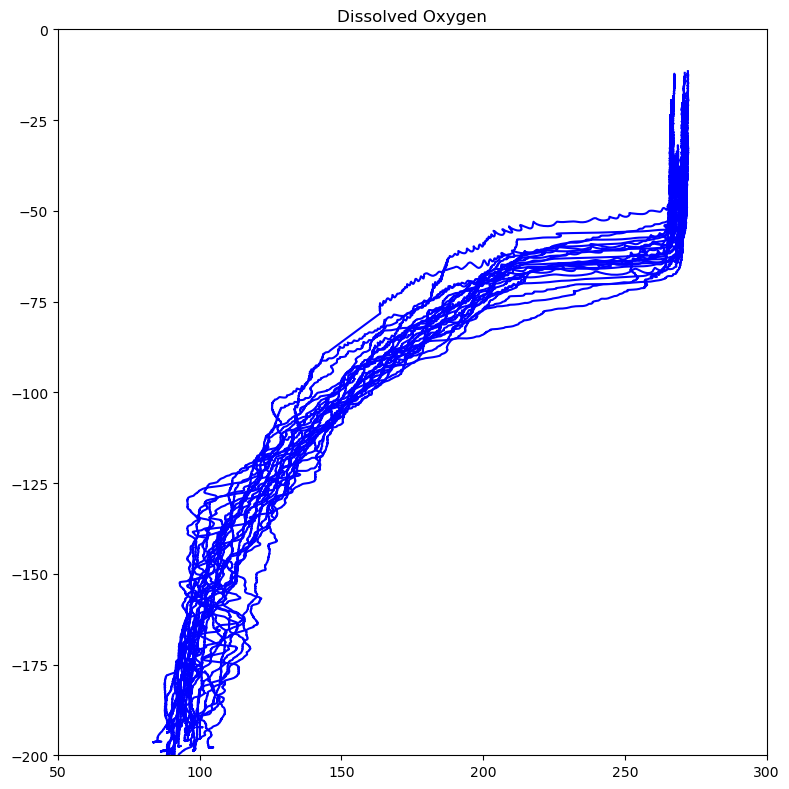

In [26]:
def LocalGenerateTimeWindowIndices(profiles, dt0, dt1):
    '''
    In UTC: Passed a time window via two bounding datetimes. Return a list of 
    profile indices for profiles that begin ascent within this time box. These 
    indices are rows in the profiles DataFrame.
    '''
    pidcs = []
    for i in range(len(profiles)):
        a0 = profiles["a0t"][i]
        if a0 >= dt0 and a0 <= dt1: pidcs.append(i)
    return pidcs


def LocalBundleChart(profiles, dt0, dt1, wid, hgt, data, depth, lo, hi, title, color):
    pidcs = LocalGenerateTimeWindowIndices(profiles, dt0, dt1)
    if len(pidcs) < 1: 
        print('LocalBundleChart(): Zero profile hits')
        return False
    fig, ax = plt.subplots(figsize=(wid, hgt), tight_layout=True)
    for i in range(len(pidcs)):
        ta0, ta1 = profiles["a0t"][pidcs[i]], profiles["a1t"][pidcs[i]]
        ax.plot(data.sel(time=slice(ta0,  ta1)), depth.sel(time=slice(ta0, ta1)), ms = 4., color=color)
    ax.set(title = title)
    ax.set(xlim = (lo, hi), ylim = (-200, 0))
    return ax

LocalBundleChart(profiles, dt64('2022-01-01T00:00:00'), dt64('2022-01-04T00:00:00'), 8, 8, d['do'][0], -d['do'][1], d['do'][2], d['do'][3], 'Dissolved Oxygen', d['do'][4])

In [ ]:
from ipywidgets import interact, widgets
from traitlets import dlink

In [ ]:
def BundleInteract(sensor_key, time_index, bundle_size):
    '''
    Consider a time range that includes many (e.g. 279) consecutive profiles. This function plots sensor data
    within the time range. Choose the sensor using a dropdown. Choose the first profile using the start slider.
    Choose the number of consecutive profiles to chart using the bundle slider. 
    Details
      - There is no support at this time for selecting midnight or noon profiles exclusively
          - nitrate, ph and pco2 bundle charts will be correspondingly sparse
      - There is a little bit of intelligence built in to the selection of ascent or descent
          - most sensors measure on ascent or ascent + descent. pco2 and ph are descent only
          - ph and pco2 still have a charting bug "last-to-first line" clutter: For some reason
            the first profile value is the last value from the prior profile. There is a hack in
            place ("i0") to deal with this.
    '''
    
    (phase0, phase1, i0) = ('a0t', 'a1t', 0) if not (sensor_key == 'ph' or sensor_key == 'pco2') else ('d0t', 'd1t', 1)
    x    = d[sensor_key][0]
    z    = d[sensor_key][1]
    xlo = d[sensor_key][2]
    xhi = d[sensor_key][3]
    xtitle = sensor_names[sensor_key]
    xcolor = d[sensor_key][4]

    # This configuration code block is hardcoded to work with March 2021
    date0, date1   = dt64('2022-01-01'), dt64('2022-02-01')
    time0, time1   = td64(0, 'h'), td64(24, 'h')
    wid, hgt       = 9, 6
    x0, x1, z0, z1 = xlo, xhi, -200, 0
    title          = xtitle
    color          = xcolor
    pidcs          = GenerateTimeWindowIndices(profiles, date0, date1, time0, time1)    # !!!!! either midn or noon, not both
    nProfiles      = len(pidcs)
    
    fig, ax = plt.subplots(figsize=(wid, hgt), tight_layout=True)
    iProf0 = time_index if time_index < nProfiles else nProfiles
    iProf1 = iProf0 + bundle_size if iProf0 + bundle_size < nProfiles else nProfiles
    for i in range(iProf0, iProf1):
        pIdx = pidcs[i]
        ta0, ta1 = profiles[phase0][pIdx], profiles[phase1][pIdx]
        xi, zi = x.sel(time=slice(ta0,  ta1)), z.sel(time=slice(ta0, ta1))
        ax.plot(xi[i0:], zi[i0:], ms = 4., color=color, mfc=color)
    ax.set(title = title)
    ax.set(xlim = (x0, x1), ylim = (z0, z1))

    # Add text indicating the current time range of the profile bundle
    # tString = str(p["ascent_start"][pIdcs[iProf0]])
    # if iProf1 - iProf0 > 1: tString += '\n ...through... \n' + str(p["ascent_start"][pIdcs[iProf1-1]])
    # ax.text(px, py, tString)
    
    plt.show()
    return

In [ ]:
def Interactor(continuous_update = False):
    '''Set up three bundle-interactive charts, vertically. Independent sliders for choice of 
    sensor, starting profile by index, and number of profiles in bundle. (90 profiles is about
    ten days.) A fast machine can have cu = True to give a slider-responsive animation. Make
    it False to avoid jerky 'takes forever' animation on less powerful machines.
    '''
    style = {'description_width': 'initial'}
    
    # data dictionary d{} keys:
    optionsList = ['temperature', 'salinity', 'density', 'conductivity', 'do', 'chlora', 'fdom', 'bb', 'pco2', 'ph', 'par', 'nitrate']

    interact(BundleInteract, \
                             sensor_key = widgets.Dropdown(options=optionsList,  value=optionsList[0], description='sensor'), \
                             time_index = widgets.IntSlider(min=0, max=270, step=1, value=160,                    \
                                                            layout=widgets.Layout(width='35%'),                   \
                                                            continuous_update=False, description='bundle start',  \
                                                            style=style),
                             bundle_size = widgets.IntSlider(min=1, max=90, step=1, value=20,                     \
                                                            layout=widgets.Layout(width='35%'),                   \
                                                            continuous_update=False, description='bundle width',  \
                                                            style=style))

    return

Interactor(False)

## Concept material

The charts below place two sensors x 3 across for a total of six. 

```{figure} ../img/ABCOST_signals_vs_depth_and_time.png
---
height: 500px
name: directive-fig
---
Salinity, Temperature, Dissolved Oxygen and Bio-optical signals with depth
```
    

In [ ]:
from IPython.display import HTML, Video
Video('./../img/multisensor_animation.mp4', embed=True, width = 500, height = 500)

### MODIS surface chlorophyll


```{figure} ../img/modis_chlorophyll.png
---
height: 500px
name: directive-fig
---
Ocean surface chlorophyll inferred from MODIS satellite images
```